**Black Scholes option pricing model (BSM)**

- The standart BSM model used for European option pricing only!
- BSM doesn't includes transaction costs (GK model also)


*For Call option pricing:*

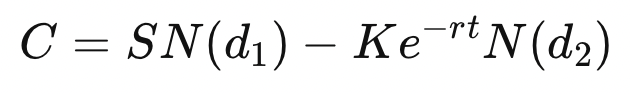

*For Put option pricing:*

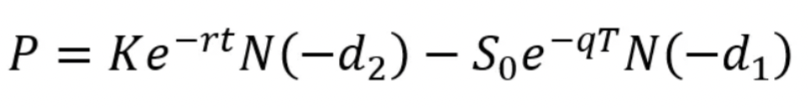

*where:*

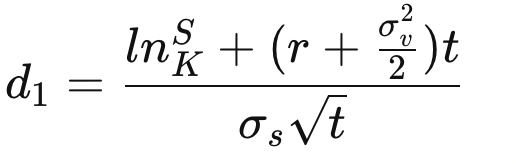

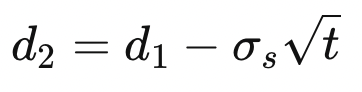

**Model parameters:**

**C** - Call option price

**S** - Underlying asset price (spot rate for FX)

**K** - Strike price

**r** - risk free rate

**t** - time to maturity

**N** - a normal distribtion

**1. Import libraries:**

In [1]:
import numpy as np
from scipy.stats import norm #for normal distribution


**2. Define variables (set model parameters):**

In [2]:
interestRate_r = 0.01
underlying_S = 30
strikeprice_K = 40
time_T = 240/365
volatility_sigma = 0.30

**3. Create a function:**

In [3]:
def blackScholes(interestRate_r, underlying_S, strikeprice_K, time_T, volatility_sigma, type="Call"):
    "Calculate BS option price for a call"
    d1 = (np.log(underlying_S/strikeprice_K) + (interestRate_r + volatility_sigma**2/2)*time_T)/(volatility_sigma*np.sqrt(time_T))
    d2 = d1 - volatility_sigma*np.sqrt(time_T)
    
    try:
        if type == "Call":
            price = underlying_S*norm.cdf(d1, 0, 1) - strikeprice_K*np.exp(-interestRate_r*time_T)*norm.cdf(d2, 0, 1)
        elif type == "Put":
            price = strikeprice_K*np.exp(-interestRate_r*time_T)*norm.cdf(-d2, 0, 1) - underlying_S*norm.cdf(-d1, 0, 1)
        return price
    except:
            print("Please confirm all option parameters above!")

In [4]:
print("Option price is: ", round(blackScholes(interestRate_r, underlying_S, strikeprice_K, time_T, volatility_sigma, type="Call"), 2) )

Option price is:  0.51
